<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Emotions Analysis | DistilBERT-BiGRU</p>

**We will do The Following Tasks in this Notebook to train a Bidirectional GRU & DistilBERT-BiGRU on Emotion Analysis :**

1. Data Resampling 
2. Data Preprocessing
3. Train the Bidirectional GRU & DistilBERT-BiGRU.
4. Visualize results.
5. Evaluations on Test Data.
6. Compare models

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">About Dataset</p>

## Introduction:

[`Emotions`](https://www.kaggle.com/datasets/nelgiriyewithana/emotions) – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

## About the Dataset:
<p>Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: 

- sadness (0)
- joy (1)
- love (2) 
- anger (3) 
- fear (4) 
- surprise (5) 

Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.</p>

## Key Features:
- text: A string feature representing the content of the Twitter message.
- label: A classification label indicating the primary emotion, with values ranging from 0 to 5.

## Sample Data:
| text                                           | label |
|------------------------------------------------|-------|
| that was what i felt when i was finally accept…| 1     |
| i take every day as it comes i'm just focussin…| 4     |
| i give you plenty of attention even when i fee…| 0     |

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Importing Libraries</p>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
from tqdm import tqdm

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Loading Data</p>

In [9]:
# Load data 
df = pd.read_csv('full.csv')    # Change to `short.csv` if want to use a smaller dataset
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [10]:
# Shape of data 
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (416809, 3)


In [11]:
# Count of Null values 
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [12]:
# Count of duplicates data
df.duplicated().sum()

0

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Renaming The Columns Names</p>

In [13]:
# Rename columns 
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
# Dropping the Index Colums
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
# Head of data
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [15]:
# Rename label also {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

In [16]:
# Head of data
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear
5,i was beginning to feel quite disheartened,Sadness
6,i would think that whomever would be lucky eno...,Love
7,i fear that they won t ever feel that deliciou...,Joy
8,im forever taking some time out to have a lie ...,Surprise
9,i can still lose the weight without feeling de...,Sadness


<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Label Count</p>


/var/folders/n2/jwp2k4ln7b71fdbtbttgjhr40000gn/T/ipykernel_41616/2893439474.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


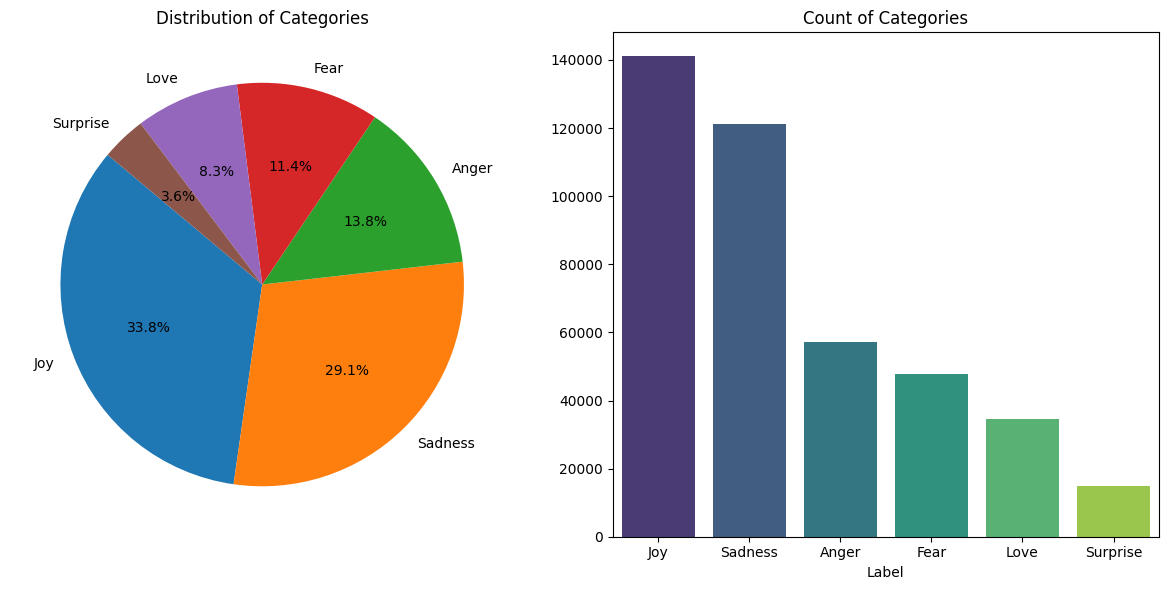

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    416809 non-null  object
 1   Label   416809 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


In [17]:
# Value count of label
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
df.info()

In [18]:
df_sadness = df[df['Label']=='Sadness']
df_joy = df[df['Label']=='Joy']
df_love = df[df['Label']=='Love']
df_anger = df[df['Label']=='Anger']
df_fear = df[df['Label']=='Fear']
df_surprise = df[df['Label']=='Surprise']
print("Number of sadness: " + str(len(df_sadness)))
print("Number of joy: " + str(len(df_joy)))
print("Number of love: " + str(len(df_love)))
print("Number of anger: " + str(len(df_anger)))
print("Number of fear: " + str(len(df_fear)))
print("Number of surprise: " + str(len(df_surprise)))

Number of sadness: 121187
Number of joy: 141067
Number of love: 34554
Number of anger: 57317
Number of fear: 47712
Number of surprise: 14972


<b>The dataset is unbalanced! Need to resample the data via Undersampling. </b>

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Data Resampling</p>

In [19]:
def data_balancing(csv_file="full.csv", ratio=1.0):
    '''
    Resample data to ensure balanced data source (if using full version of dataset, the number of entries after resampling is around 90000).

    Parameters:
    - csv_file: String. CSV file that contains data source.
                Defaults to "full.csv" (entire emotion dataset).
    - ratio: Float (optional). The ratio of data to select from the source dataset.
             Should be a value between 0.0 and 1.0, where 1.0 selects all data.
             Defaults to 1.0 (select all data).

    Returns:
    - data_balanced: Pandas DataFrame, the balanced data frame after resampling.
    '''
    # Read data from CSV file.
    data = pd.read_csv(csv_file)
    # Separate data by class
    classes = data['label'].unique()
    data_by_class = {emotion: data[data['label'] == emotion] for emotion in classes}
    # Find the number of samples in the minority class.
    minority_class = min(len(data_by_class[emotion]) for emotion in classes)
    # Decide the number of data to keep for each class.
    number_per_class = int(minority_class * ratio)
    # Resample each class to match the number of samples in the minority class.
    data_resampled = {}
    for emotion in classes:
        data_resampled[emotion] = resample(data_by_class[emotion], replace=True, n_samples=number_per_class, random_state=42)
    # Combine resampled dataframes into a single dataframe.
    data_balanced = pd.concat(list(data_resampled.values()))
    # Shuffle the dataframe to ensure randomness
    data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    return data_balanced

In [20]:
raw_data = data_balancing("full.csv", 1)    # Number of data points: 89832
raw_data.head(10)

,Unnamed: 0,text,label
0,54345,i have acne myself and i find my face feeling ...,3
1,16739,i feel so lame and annoying and generally unli...,0
2,409816,i have a pile of cards she s sent my family ov...,1
3,95557,i guess what happens more is that i just feel ...,3
4,144473,i personally feel that and all because of that...,3
5,381461,im happy that he is no longer itchy and his sk...,3
6,85018,i feel other than amazed,5
7,164757,i think what i really need to work on this yea...,4
8,379213,i feel disrespected are examples of violent co...,3
9,406461,i was little i admired her with calculated dis...,4


<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Data Preprocessing</p>

1. **Remove URLs:** Uses a regular expression to remove URLs from the text data.

2. **Remove special characters and punctuation:** Uses a regular expression to remove any special characters and punctuation marks from the text.

3. **Remove extra whitespaces:** Uses a regular expression to remove extra whitespaces and replace them with a single space.

4. **Remove numeric values:** Uses a regular expression to remove any numeric values from the text.

5. **Lowercasing:** Converts all text to lowercase to ensure consistency.

6. **Remove stop words:** Removes common English stop words, such as "the," "is," "and," etc., using NLTK's stopwords list.

7. **Remove non-alphanumeric characters:** Uses a regular expression to remove any non-alphanumeric characters from the text.

*Overall, these preprocessing steps help clean and normalize the text data, removing noise and ensuring that the data is consistent and suitable for further analysis or modeling tasks.*

In [21]:
# Import basis needed libaries 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download NLTK resources (uncomment the following line if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/lejing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lejing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def data_preprocessing(data):
    '''
    Perform data preprocessing.

    Parameters:
    - data: Pandas DataFrame. Balanced data frame after resampling.

    Returns:
    - data: Pandas DataFrame. Sanitized data after preprocessing.
    '''
    # Dropping the index colums.
    data.drop('Unnamed: 0', inplace=True, axis=1)
    # Preprocess: 1. Remove urls.
    data['text'] = data['text'].str.replace(r'http\S+', '', regex=True)
    # Preprocess: 2. Remove special characters and punctuation: Negates any character that is not in the set of word characters and whitespace characters.
    data['text'] = data['text'].str.replace(r'[^\w\s]', '', regex=True)
    # Preprocess: 3. Remove extra whitespaces.
    data['text'] = data['text'].str.replace(r'\s+', ' ', regex=True)
    # Preprocess: 4. Remove numeric values.
    data['text'] = data['text'].str.replace(r'\d+', '', regex=True)
    # Preprocess: 5. Lowercasing
    data['text'] = data['text'].str.lower()
    # Preprocess: 6. Remove stop words in English: Reduce noise word like "the", "is", "and", etc. 
    stop = set(stopwords.words('english'))
    data["text"] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
    # Preprocess: 7. Remove non-alphanumeric characters.
    data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

    return data

In [23]:
data = data_preprocessing(raw_data)
data.head(10)

,text,label
0,acne find face feeling much less irritated sof...,3
1,feel lame annoying generally unliked sometimes,0
2,pile cards sent family years awesome way make ...,1
3,guess happens feel wronged friend something,3
4,personally feel stubborn wretch azaz roared ma...,3
5,im happy longer itchy skin longer feels like s...,3
6,feel amazed,5
7,think really need work year feeling frantic,4
8,feel disrespected examples violent communication,3
9,little admired calculated distance feeling som...,4


In [24]:
count = data['label'].value_counts()
count

label
3    14972
0    14972
1    14972
5    14972
4    14972
2    14972
Name: count, dtype: int64

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Bidirectional GRU</p>

<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Train Test Split</p>

In [25]:
X = data['text']
y = data['label']

# Train Test Split 
X_train, X_temp, y_train, y_temp = train_test_split(X, y,
                                                    random_state = 42,
                                                    test_size = 0.2,
                                                    shuffle=True)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp,
                                                random_state = 42,
                                                test_size = 0.5,
                                                shuffle=True)

# Print the shapes of the training testing and validation sets.
print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_val:", X_val.shape)
print("Shape y_val:", y_val.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)


Shape X_train: (71865,)
Shape y_train: (71865,)
Shape X_val: (8984,)
Shape y_val: (8984,)
Shape X_test: (8983,)
Shape y_test: (8983,)


<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Tokenization and Padding Sequences</p>

1. **Tokenization:** Tokenization is the process of converting text into a sequence of numbers or tokens. The text data in `X_train` and `X_test` is tokenized using the Tokenizer class from Keras. This step converts the text data into sequences of integers, where each unique word in the dataset is assigned a unique integer index. The `num_words` parameter limits the vocabulary size to 50,000 most frequent words.

2. **Padding:** Padding is the process of adding zero values to a sequence of words so that all sequences have the same length. This is useful because RNN models require inputs with uniform length. Padding is performed to make the lengths of all sequences the same, regardless of the original length of the sentences. After tokenization, the sequences in `X_train` and `X_test` are padded to ensure uniform length. This is achieved using the pad_sequences function, which pads sequences with zeros to make them all of the same length (`maxlen`). Padding is done after the sequences to ensure that the actual content of the text is preserved. 

**Overall, the code prepares the text data for further processing and modeling by converting it into tokenized and padded sequences, making it suitable for use in machine learning algorithms such as neural networks.**

In [26]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [27]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 46


In [28]:
# Perform padding on X_train, X_val and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Print the padded sequences for X_train, X_val and X_test
print("X_train_padded:")
print(X_train_padded)
print("X_val_padded:")
print(X_val_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[ 1380   239 10344 ...     0     0     0]
 [    1    67    55 ...     0     0     0]
 [  137     1   338 ...     0     0     0]
 ...
 [   48    52     1 ...     0     0     0]
 [    1   623   156 ...     0     0     0]
 [    5     1     3 ...     0     0     0]]
X_val_padded:
[[   1  701  138 ...    0    0    0]
 [  35 1646   22 ...    0    0    0]
 [  16  672   20 ...    0    0    0]
 ...
 [   1  968   98 ...    0    0    0]
 [ 239   74  433 ...    0    0    0]
 [   1  194  183 ...    0    0    0]]

X_test_padded:
[[1761  541 2514 ...    0    0    0]
 [ 281 1743 4029 ...    0    0    0]
 [  26  183   98 ...    0    0    0]
 ...
 [   1 1612  475 ...    0    0    0]
 [   1  174  177 ...    0    0    0]
 [   1    5  207 ...    0    0    0]]


In [29]:
# Embedding Input Size / Vocabulary Size 
input_Size = np.max(X_train_padded) + 1
input_Size

30568

<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Model Building</p>

- `model = Sequential()` initializes a sequential model, allowing layers to be added in sequence.

- The `Embedding` layer is added to the model. It is responsible for converting input integers (each representing a word index) into dense vectors of fixed size. This layer is essential for handling textual data.

- `Dropout` layer with a dropout rate of 0.5 is added next. Dropout layers help prevent overfitting by randomly setting a fraction of input units to zero during training.

- Two Bidirectional GRU layers are added sequentially. Bidirectional layers process the input sequence in both directions, allowing the model to capture information from past and future states. The `return_sequences=True` argument ensures that the output sequences are returned for each timestep.

- `BatchNormalization` layer is added to normalize the activations of the previous layer at each batch, aiding in faster and more stable training.

- Another Bidirectional GRU layer is added to capture bidirectional dependencies more effectively.

- The final `Dense` layer with 6 units (for 6 classes) and softmax activation function is added as the output layer for multi-class classification.

- The model is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the evaluation metric.

- `model.summary()` prints the summary of the model, displaying the architecture and parameter details.

In [30]:
# Define the model
bigru_model = Sequential()

# Add embedding layer
bigru_model.add(Embedding(input_dim=input_Size, output_dim=50, input_shape=(maxlen,)))

# Dropout
bigru_model.add(Dropout(0.5))

# Add bidirectional GRU layer
bigru_model.add(Bidirectional(GRU(120, return_sequences=True)))
bigru_model.add(Bidirectional(GRU(64, return_sequences=True)))

# Batch normalization
bigru_model.add(BatchNormalization())

# Add bidirectional GRU layer
bigru_model.add(Bidirectional(GRU(64)))

# Add output layer
bigru_model.add(Dense(6, activation='softmax'))

# Compile the model
bigru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
bigru_model.summary()

/Users/lejing/Desktop/nlpclass-1241-g-Fighting/project/venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 46, 50)         │     1,528,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 46, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 46, 240)        │       123,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 46, 128)        │       117,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,845,526 (7.04 MB)

 Trainable params: 1,845,270 (7.04 MB)

 Non-trainable params: 256 (1.00 KB)

<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Model Training</p>

In [31]:
# Model train 
bigru_history = bigru_model.fit(X_train_padded, y_train, epochs=10, batch_size=512, validation_data=(X_val_padded, y_val))

Epoch 1/10


141/141 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.4997 - loss: 1.2512 - val_accuracy: 0.8404 - val_loss: 0.9724
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 139s 983ms/step - accuracy: 0.9283 - loss: 0.2036 - val_accuracy: 0.9127 - val_loss: 0.3516
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.9434 - loss: 0.1454 - val_accuracy: 0.9332 - val_loss: 0.1727
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.9509 - loss: 0.1193 - val_accuracy: 0.9416 - val_loss: 0.1429
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9581 - loss: 0.1015 - val_accuracy: 0.9384 - val_loss: 0.1415
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 137s 968ms/step - accuracy: 0.9604 - loss: 0.0928 - val_accuracy: 0.9346 - val_loss: 0.1448
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 132s 936ms/step - accuracy: 0.9638 - loss: 0.0862 - val_accuracy: 0.9423 - val_loss: 0.1432
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 140s 990ms/step - accuracy: 0.9667 - loss: 0.0800 - val_acc

<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Visualizing Results</p>

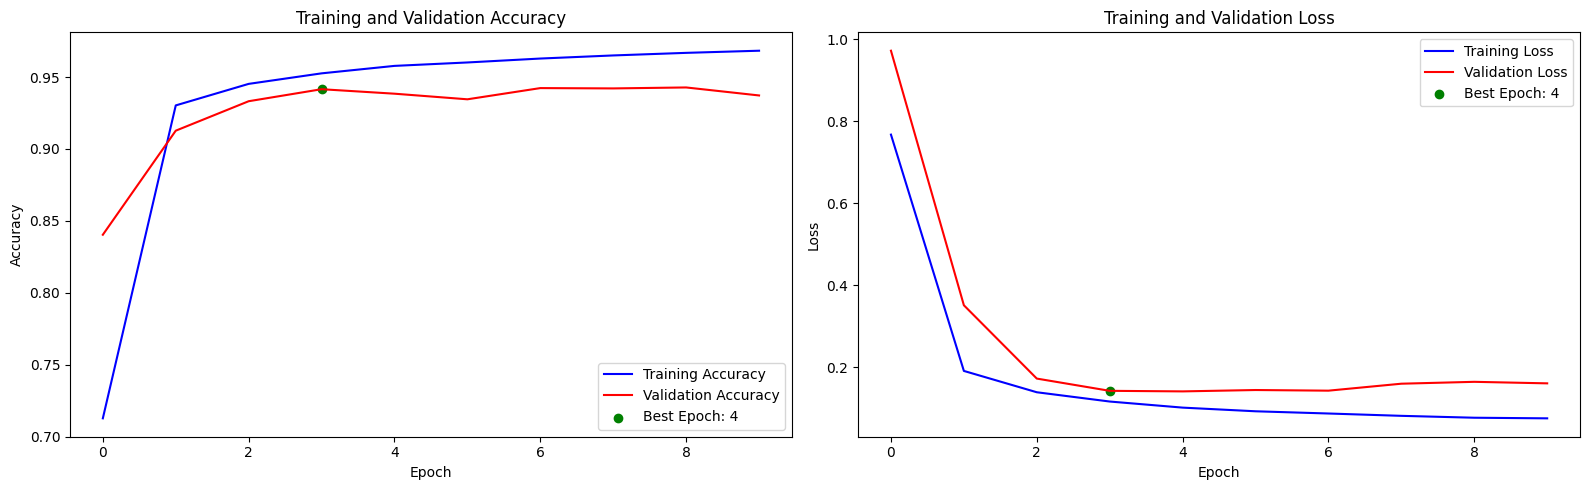

In [35]:
bigru_best_epoch = 4

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(bigru_history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(bigru_history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(bigru_best_epoch - 1, bigru_history.history['val_accuracy'][bigru_best_epoch - 1], color='green', label=f'Best Epoch: {bigru_best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(bigru_history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(bigru_history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(bigru_best_epoch - 1, bigru_history.history['val_loss'][bigru_best_epoch - 1], color='green',label=f'Best Epoch: {bigru_best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Model Evaluation</p>

In [26]:
# Evaluate testing data 
bigru_model.evaluate(X_test_padded, y_test)

103/281 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9448 - loss: 0.1551

281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9436 - loss: 0.1524


[0.151039719581604, 0.9418902397155762]

In [27]:
# Predictions on test data for confustion matrix 
from sklearn.metrics import confusion_matrix
y_pred = bigru_model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

111/281 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step

281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


<Axes: >

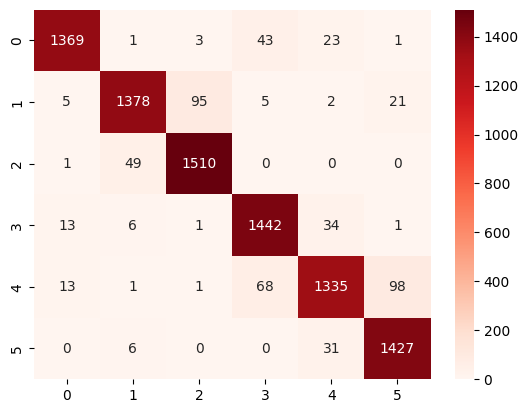

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

In [29]:
bigru_accuracy = metrics.accuracy_score(y_test, y_pred)
bigru_precision = metrics.precision_score(y_test, y_pred, average="macro", zero_division=0.0)
bigru_recall = metrics.recall_score(y_test, y_pred, average="macro", zero_division=0.0)
bigru_f1 = metrics.f1_score(y_test, y_pred, average="macro", zero_division=0.0)
bigru_report = metrics.classification_report(y_test, y_pred, target_names=["Sadness", "Joy", "Love", "Anger", "Fear", "Surprise"], zero_division=0.0, digits=4)

In [30]:
print(bigru_report)

              precision    recall  f1-score   support

     Sadness     0.9772    0.9507    0.9637      1440
         Joy     0.9563    0.9150    0.9352      1506
        Love     0.9379    0.9679    0.9527      1560
       Anger     0.9255    0.9633    0.9440      1497
        Fear     0.9368    0.8806    0.9079      1516
    Surprise     0.9218    0.9747    0.9475      1464

    accuracy                         0.9419      8983
   macro avg     0.9426    0.9420    0.9418      8983
weighted avg     0.9424    0.9419    0.9417      8983



<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Evaluate with Different Dataset</p>

In [36]:
OUTPUTFILE = "output.txt"
TESTFILE = "test.txt"
REFERENCEFILE = "reference.txt"

# Load testing data from file
with open(TESTFILE, "r") as test_file:
    for line in test_file:
        sentence = line.strip()
        test_data.append(sentence)

# Define mapping of indices to labels.
index_to_label = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [41]:
# Define predict label function.
def bigru_predict(model, test_data, OUTPUTFILE):
    with open(OUTPUTFILE, 'w') as output_file:
        
        for sentence in test_data: 
            # Tokenize the sentence.
            tokenized_text = tokenizer.texts_to_sequences([sentence])
            
            # Pad the tokenized sequence
            padded_tokenized_text = pad_sequences(tokenized_text, maxlen=maxlen, padding='post')

            # Make predictions
            predictions = model.predict(padded_tokenized_text)

            # Convert probabilities to predicted label indices
            predicted_index = np.argmax(predictions[0])
            
            # Convert the predicted label to text.
            predicted_label = index_to_label[predicted_index]  
                
            # Write original sentence and predicted label to output file
            output_file.write(f"{sentence};{predicted_label}\n")
                
                
# Define the function to compare the difference between reference.txt and output.txt => Calculate accuracy.
def bigru_evaluate(OUTPUTFILE, REFERENCEFILE):
    # Open both files.
    with open(OUTPUTFILE, 'r') as output, open(REFERENCEFILE, 'r') as ref:
        
        # Read the lines from each file.
        lines_output = output.readlines()
        lines_ref = ref.readlines()

        # Count the number of lines in each file.
        num_lines_output = len(lines_output)
        num_lines_ref = len(lines_ref)

        # Initialize counter for different lines.
        num_identical_lines = 0

        # Iterate through lines and compare
        min_num_lines = min(num_lines_output, num_lines_ref)
        for i in range(min_num_lines):
            if lines_output[i] == lines_ref[i]:
                num_identical_lines += 1
    
    # Return accuracy        
    return num_identical_lines / num_lines_ref

In [ ]:
# Start testing
bigru_predict(bigru_model, test_data, OUTPUTFILE)

In [46]:
accuracy = bigru_evaluate(OUTPUTFILE, REFERENCEFILE)
print("Accuracy:", accuracy)

Accuracy: 0.9305


<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">DistilBERT-BiGRU</p>

In [47]:
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModel, AutoTokenizer

In [48]:
# HYPERPARAMETERS
HP = {
    "BATCH_SIZE": 128,          
    "LEARNING_RATE": 2e-5,      
    "NUM_EPOCHS": 5,           
    "HIDDEN_SIZE": 256,         
    "NUM_LAYERS": 4,            
    "MAX_LENGTH": 128,         
}

<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Tokenization</p>

In [49]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [50]:
class EmotionDataset(Dataset):
    '''
    Dataset class defines how the text-label is pre-processed before sending it to the model.
    '''
    def __init__(self, dataframe, tokenizer, max_length):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.loc[idx, 'text']
        label = self.data.loc[idx, 'label']
        encoded_inputs = self.tokenizer(text, 
                                        padding='max_length', 
                                        truncation=True, 
                                        max_length=self.max_length, 
                                        return_tensors='pt')
        # Note: Can return token_type_ids by setting return_token_type_ids to True.
        # For our task, token_type_ids is optional because our classification task only requires one sequence as input.
        input_ids = encoded_inputs['input_ids']
        attention_mask = encoded_inputs['attention_mask']
        
        return {
            'input_ids': input_ids,           
            'attention_mask': attention_mask,
            'label': label
        }

<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Train Test Split</p>

In [51]:
dataset = EmotionDataset(data, tokenizer, max_length=HP["MAX_LENGTH"])
train_data, temp_data = train_test_split(dataset, test_size=0.2, random_state=42)
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [52]:
train_loader = DataLoader(train_data, batch_size=HP["BATCH_SIZE"], shuffle=True)
test_loader = DataLoader(test_data, batch_size=HP["BATCH_SIZE"], shuffle=True)
val_loader = DataLoader(val_data, batch_size=HP["BATCH_SIZE"], shuffle=True)

print("Train Dataset: {}".format(len(train_data)))
print("Test Dataset: {}".format(len(test_data)))
print("Validation Dataset: {}".format(len(val_data)))

Train Dataset: 71865
Test Dataset: 8983
Validation Dataset: 8984


<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Model Building</p>

In [60]:
import torch.nn as nn
import torch

In [38]:
class DistilBERTBiGRU(nn.Module):
    def __init__(self, bert_model_name, hidden_size, num_layers, num_classes):
        super(DistilBERTBiGRU, self).__init__()
        self.bert = AutoModel.from_pretrained(bert_model_name)
        self.gru = nn.GRU(input_size=768, hidden_size=hidden_size, num_layers=num_layers, bidirectional=True, batch_first=True)  
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(hidden_size * 2, num_classes)  # Multiply by 2 since it is bidirectional.
        self.activation = nn.Tanh()
    

    def forward(self, input_ids, attention_mask):
        # DistilBERT Layer
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)[0]  # Last hidden state: (batch_size, sequence_length, hidden_size)
        
        # Bi-GRU Layer
        gru_output, _ = self.gru(bert_output)       # Output: (batch_size, seq_length, num_direction * hidden_size)
 
        last_hidden_output = gru_output[:, -1, :]   # Output: (batch_size, num_direction * hidden_size)
        
        # Option 2: Element-wise Max Pooling
        max_pooling_output, _ = torch.max(gru_output, dim=1)  # Max pooling along the sequence dimension

        # Option 3: Mean Pooling
        mean_pooling_output = torch.mean(gru_output, dim=1)  # Mean pooling along the sequence dimension
        
        # Dropout Layer
        dropout_output = self.dropout(mean_pooling_output)

        # Classification Layer
        output = self.classifier(dropout_output)    # Output: (batch_size, num_classes)
 
        # Activation Layer  
        probabilities = self.activation(output)     # Output: (batch_size, num_classes)

        return probabilities

In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

distilbert_bigru_model = DistilBERTBiGRU(bert_model_name='distilbert-base-uncased', hidden_size=HP["HIDDEN_SIZE"], num_layers=HP["NUM_LAYERS"], num_classes=6)
distilbert_bigru_model.to(device)

DistilBERTBiGRU(
  (bert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(

<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Model Training</p>

In [40]:
# Train model
def train(model, train_loader, optimizer, criterion, device, epoch):
    epoch_loss = 0
    label_trues = []
    label_preds = []

    # Set the model to training mode.
    model.train()
    
    # Iterate over the training dataset
    for _, data in tqdm(enumerate(train_loader, 0), desc="Training"):
        # Move batch to device.
        input_ids = data['input_ids'].squeeze(1).to(device)
        attention_mask = data['attention_mask'].squeeze(1).to(device)
        label = data['label'].to(device) 
        
        # Forward pass.
        outputs = model(input_ids, attention_mask)
        
        # Zero the gradients.
        optimizer.zero_grad()
        
        # Compute the loss.
        loss = criterion(outputs, label)
        epoch_loss += loss.item()
        
        if _%50 == 0:
            print(f'Epoch: {epoch+1}, Loss:  {loss.item()}')
        
        # Backward pass.
        loss.backward()
        
        # Update the model parameters.
        optimizer.step()

        # Find the indices of the maximum values along dim=1 (across classes).
        preds = torch.argmax(outputs, axis=1)
            
        label_preds.extend(preds.cpu().detach().numpy().tolist())
        label_trues.extend(label.cpu().detach().numpy().tolist())
        
    # Calcualte test loss.
    loss = epoch_loss / len(train_loader)

    # Evaluate on accuracy, precision, recall and F1 score.
    accuracy = metrics.accuracy_score(label_trues, label_preds)

    return loss, accuracy

In [62]:
# Evaluate model
def evaluate(model, test_loader, criterion, device):
    epoch_loss = 0
    label_trues = []
    label_preds = []

    # Set the model to evaluation mode.
    model.eval()
    
    with torch.no_grad():
        for _, data in tqdm(enumerate(test_loader, 0), desc="Evaluating"):
            input_ids = data['input_ids'].squeeze(1).to(device)
            attention_mask = data['attention_mask'].squeeze(1).to(device)
            label = data['label'].to(device)
            
            # Predicted output.
            outputs = model(input_ids, attention_mask)

            # Compute the loss.
            loss = criterion(outputs, label)
            epoch_loss += loss.item()
            
            # Find the indices of the maximum values along dim=1 (across classes).
            preds = torch.argmax(outputs, axis=1)
            
            label_preds.extend(preds.cpu().detach().numpy().tolist())
            label_trues.extend(label.cpu().detach().numpy().tolist())
    
    # Calcualte test loss.
    loss = epoch_loss / len(test_loader)

    # Evaluate on accuracy, precision, recall, F1 score and classification report.
    accuracy = metrics.accuracy_score(label_trues, label_preds)
    precision = metrics.precision_score(label_trues, label_preds, average="macro", zero_division=0.0)
    recall = metrics.recall_score(label_trues, label_preds, average="macro", zero_division=0.0)
    f1 = metrics.f1_score(label_trues, label_preds, average="macro", zero_division=0.0)
    report = metrics.classification_report(label_trues, label_preds, target_names=["Sadness", "Joy", "Love", "Anger", "Fear", "Surprise"], zero_division=0.0, digits=4)
    
    return loss, accuracy, precision, recall, f1, report

In [42]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

optimizer = torch.optim.AdamW(distilbert_bigru_model.parameters(), lr=HP["LEARNING_RATE"])
criterion = nn.CrossEntropyLoss()
    
epochs = HP["NUM_EPOCHS"]
distilbert_bigru_history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}
best_val_loss = float('inf')

for epoch in range(epochs):
    train_loss, train_acc = train(distilbert_bigru_model, train_loader, optimizer, criterion, device, epoch)
    val_loss, val_acc, val_precision, val_recall, val_f1, _ = evaluate(distilbert_bigru_model, val_loader, criterion, device)

    # Update the dictionary with the metrics
    distilbert_bigru_history['train_loss'].append(train_loss)
    distilbert_bigru_history['val_loss'].append(val_loss)
    distilbert_bigru_history['train_acc'].append(train_acc)
    distilbert_bigru_history['val_acc'].append(val_acc)

    print(f'Epoch {epoch+1}/{epochs}:')
    print(f'\t Average Train Loss: {train_loss:.4f} |  Train Accuracy: {train_acc:.4f}')
    print(f'\t Average Val Loss: {val_loss:.4f} |  Val Accuracy: {val_acc:.4f}')
    print(f'\t Val F1 Score: {val_f1:.4f} | Val Precision: {val_precision:.4f} | Val Recall: {val_recall:.4f}')

Training: 0it [00:00, ?it/s]

Epoch: 1, Loss:  1.7821756601333618


Training: 50it [18:41, 22.40s/it]

Epoch: 1, Loss:  1.0893852710723877


Training: 100it [39:26, 27.75s/it]

Epoch: 1, Loss:  0.828864574432373


Training: 150it [1:01:14, 26.38s/it]

Epoch: 1, Loss:  0.6433796286582947


Training: 200it [1:22:04, 24.14s/it]

Epoch: 1, Loss:  0.6582126617431641


Training: 250it [1:42:46, 25.38s/it]

Epoch: 1, Loss:  0.6173849105834961


Training: 300it [2:03:36, 24.79s/it]

Epoch: 1, Loss:  0.6385458707809448


Training: 350it [2:24:07, 23.69s/it]

Epoch: 1, Loss:  0.6013619899749756


Training: 400it [2:44:31, 24.11s/it]

Epoch: 1, Loss:  0.6690091490745544


Training: 450it [3:05:19, 24.62s/it]

Epoch: 1, Loss:  0.6246217489242554


Training: 500it [3:26:03, 26.04s/it]

Epoch: 1, Loss:  0.5951613783836365


Training: 550it [3:46:55, 24.55s/it]

Epoch: 1, Loss:  0.5829268097877502


Training: 562it [3:51:42, 24.74s/it]
Evaluating: 71it [05:17,  4.47s/it]


Epoch 1/5:
	 Average Train Loss: 0.7387 |  Train Accuracy: 0.8853
	 Average Val Loss: 0.6033 |  Val Accuracy: 0.9471
	 Val F1 Score: 0.9463 | Val Precision: 0.9492 | Val Recall: 0.9464


Training: 0it [00:00, ?it/s]

Epoch: 2, Loss:  0.6411958932876587


Training: 50it [20:53, 26.25s/it]

Epoch: 2, Loss:  0.6242056488990784


Training: 100it [41:18, 24.39s/it]

Epoch: 2, Loss:  0.5885478854179382


Training: 150it [1:01:54, 24.93s/it]

Epoch: 2, Loss:  0.615460216999054


Training: 200it [1:22:29, 24.96s/it]

Epoch: 2, Loss:  0.6332123875617981


Training: 250it [1:43:01, 24.95s/it]

Epoch: 2, Loss:  0.615240752696991


Training: 300it [2:03:34, 25.58s/it]

Epoch: 2, Loss:  0.5837939381599426


Training: 350it [2:24:00, 23.97s/it]

Epoch: 2, Loss:  0.5888476967811584


Training: 400it [2:44:25, 24.67s/it]

Epoch: 2, Loss:  0.5801723003387451


Training: 450it [3:04:59, 24.18s/it]

Epoch: 2, Loss:  0.6182941794395447


Training: 500it [3:25:24, 25.13s/it]

Epoch: 2, Loss:  0.5767300724983215


Training: 550it [3:45:49, 24.86s/it]

Epoch: 2, Loss:  0.5896697640419006


Training: 562it [3:50:31, 24.61s/it]
Evaluating: 71it [05:12,  4.40s/it]


Epoch 2/5:
	 Average Train Loss: 0.5995 |  Train Accuracy: 0.9479
	 Average Val Loss: 0.5899 |  Val Accuracy: 0.9522
	 Val F1 Score: 0.9518 | Val Precision: 0.9538 | Val Recall: 0.9517


Training: 0it [00:00, ?it/s]

Epoch: 3, Loss:  0.5928360223770142


Training: 50it [20:47, 24.40s/it]

Epoch: 3, Loss:  0.579869270324707


Training: 100it [41:32, 24.93s/it]

Epoch: 3, Loss:  0.5555596947669983


Training: 150it [1:02:15, 24.53s/it]

Epoch: 3, Loss:  0.5947605967521667


Training: 200it [1:23:12, 25.82s/it]

Epoch: 3, Loss:  0.5954583287239075


Training: 250it [1:44:14, 25.62s/it]

Epoch: 3, Loss:  0.6082546710968018


Training: 300it [2:04:42, 25.40s/it]

Epoch: 3, Loss:  0.5788626074790955


Training: 350it [2:25:29, 25.52s/it]

Epoch: 3, Loss:  0.6228002309799194


Training: 400it [2:46:09, 25.84s/it]

Epoch: 3, Loss:  0.6066652536392212


Training: 450it [3:06:55, 23.43s/it]

Epoch: 3, Loss:  0.5666776895523071


Training: 500it [3:27:35, 24.48s/it]

Epoch: 3, Loss:  0.6040940880775452


Training: 550it [3:48:28, 24.36s/it]

Epoch: 3, Loss:  0.5985994935035706


Training: 562it [3:53:17, 24.91s/it]
Evaluating: 71it [05:15,  4.45s/it]


Epoch 3/5:
	 Average Train Loss: 0.5911 |  Train Accuracy: 0.9513
	 Average Val Loss: 0.5892 |  Val Accuracy: 0.9508
	 Val F1 Score: 0.9503 | Val Precision: 0.9523 | Val Recall: 0.9502


Training: 0it [00:00, ?it/s]

Epoch: 4, Loss:  0.5894967317581177


Training: 50it [20:41, 24.91s/it]

Epoch: 4, Loss:  0.5612586736679077


Training: 100it [41:55, 26.23s/it]

Epoch: 4, Loss:  0.578361451625824


Training: 150it [1:03:16, 24.73s/it]

Epoch: 4, Loss:  0.5557684302330017


Training: 200it [1:24:23, 23.93s/it]

Epoch: 4, Loss:  0.5903987884521484


Training: 250it [1:45:33, 25.23s/it]

Epoch: 4, Loss:  0.6061199903488159


Training: 300it [2:06:49, 24.89s/it]

Epoch: 4, Loss:  0.5647459626197815


Training: 350it [2:27:59, 25.62s/it]

Epoch: 4, Loss:  0.6258256435394287


Training: 400it [2:49:15, 24.55s/it]

Epoch: 4, Loss:  0.5785746574401855


Training: 450it [3:10:23, 24.57s/it]

Epoch: 4, Loss:  0.5684686303138733


Training: 500it [3:31:19, 26.31s/it]

Epoch: 4, Loss:  0.5834314823150635


Training: 550it [3:52:40, 24.87s/it]

Epoch: 4, Loss:  0.5741222500801086


Training: 562it [3:57:33, 25.36s/it]
Evaluating: 71it [05:28,  4.63s/it]


Epoch 4/5:
	 Average Train Loss: 0.5869 |  Train Accuracy: 0.9536
	 Average Val Loss: 0.5869 |  Val Accuracy: 0.9524
	 Val F1 Score: 0.9518 | Val Precision: 0.9539 | Val Recall: 0.9518


Training: 0it [00:00, ?it/s]

Epoch: 5, Loss:  0.5715174674987793


Training: 50it [21:21, 24.44s/it]

Epoch: 5, Loss:  0.5724678635597229


Training: 100it [42:44, 24.29s/it]

Epoch: 5, Loss:  0.5602944493293762


Training: 150it [1:03:50, 25.83s/it]

Epoch: 5, Loss:  0.5991590023040771


Training: 200it [1:25:17, 24.92s/it]

Epoch: 5, Loss:  0.5513150691986084


Training: 250it [1:46:53, 25.59s/it]

Epoch: 5, Loss:  0.5734302997589111


Training: 300it [2:08:00, 26.45s/it]

Epoch: 5, Loss:  0.5704777836799622


Training: 350it [2:29:19, 24.68s/it]

Epoch: 5, Loss:  0.5722654461860657


Training: 400it [2:50:27, 25.41s/it]

Epoch: 5, Loss:  0.5899772644042969


Training: 450it [3:12:16, 24.85s/it]

Epoch: 5, Loss:  0.6030140519142151


Training: 500it [3:33:47, 25.50s/it]

Epoch: 5, Loss:  0.5688868165016174


Training: 550it [3:55:34, 25.86s/it]

Epoch: 5, Loss:  0.5572304725646973


Training: 562it [4:00:25, 25.67s/it]
Evaluating: 71it [05:50,  4.93s/it]

Epoch 5/5:
	 Average Train Loss: 0.5846 |  Train Accuracy: 0.9540
	 Average Val Loss: 0.5893 |  Val Accuracy: 0.9522
	 Val F1 Score: 0.9519 | Val Precision: 0.9539 | Val Recall: 0.9517


<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Visualizing Results</p>

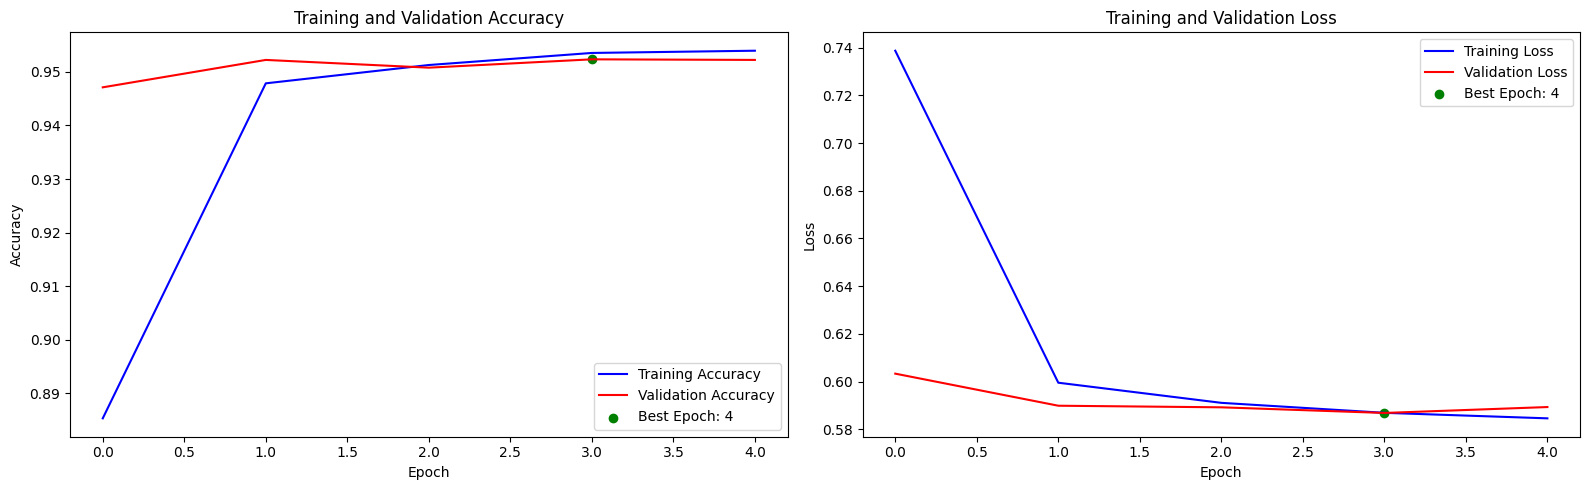

In [44]:
# Get the epoch with the highest validation accuracy
distilbert_bigru_best_epoch = distilbert_bigru_history['val_acc'].index(max(distilbert_bigru_history['val_acc'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(distilbert_bigru_history['train_acc'], label='Training Accuracy', color='blue')
axs[0].plot(distilbert_bigru_history['val_acc'], label='Validation Accuracy', color='red')
axs[0].scatter(distilbert_bigru_best_epoch - 1, distilbert_bigru_history['val_acc'][distilbert_bigru_best_epoch - 1], color='green', label=f'Best Epoch: {distilbert_bigru_best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(distilbert_bigru_history['train_loss'], label='Training Loss', color='blue')
axs[1].plot(distilbert_bigru_history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(distilbert_bigru_best_epoch - 1, distilbert_bigru_history['val_loss'][distilbert_bigru_best_epoch - 1], color='green',label=f'Best Epoch: {distilbert_bigru_best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Model Evaluation</p>

In [45]:
test_loss, test_acc, test_precision, test_recall, test_f1, test_report = evaluate(distilbert_bigru_model, test_loader, criterion, device)

Evaluating: 71it [07:57,  6.72s/it]


In [46]:
print(test_report)

              precision    recall  f1-score   support

     Sadness     0.9884    0.9486    0.9681      1440
         Joy     0.9964    0.9084    0.9503      1506
        Love     0.9391    0.9981    0.9677      1560
       Anger     0.9616    0.9532    0.9574      1497
        Fear     0.9383    0.9235    0.9309      1516
    Surprise     0.9184    1.0000    0.9575      1464

    accuracy                         0.9554      8983
   macro avg     0.9570    0.9553    0.9553      8983
weighted avg     0.9569    0.9554    0.9553      8983



<p style="font-family: Arial, sans-serif; font-size: 21px; text-align: center; color: #FFFFAD;">Evaluate with Different Dataset</p>

In [5]:
import torch
from tqdm import tqdm
from transformers import AutoTokenizer
from distilbert_bigru import DistilBERTBiGRU

[nltk_data] Downloading package punkt to /Users/lejing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lejing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
OUTPUTFILE = "output.txt"
TESTFILE = "test.txt"
REFERENCEFILE = "reference.txt"

In [55]:
# Load testing dataset
test_data = []

# Load testing data from file
with open(TESTFILE, "r") as test_file:
    for line in test_file:
        sentence = line.strip()
        test_data.append(sentence)

# Define mapping of indices to labels.
index_to_label = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [65]:
# Define predict label function.
def predict(model, test_data, OUTPUTFILE):
    with open(OUTPUTFILE, 'w') as output_file:
        # Initialize tqdm progress bar
        progress_bar = tqdm(test_data, desc="Testing")
        
        with torch.no_grad():
            for sentence in progress_bar: 
                # Tokenize the sentence.
                tokenized_data = tokenizer(sentence, padding='max_length', truncation=True, max_length=128, return_tensors='pt')

                # Predict output.
                ouputs = model(**tokenized_data)
                
                # Convert output to predicted label.
                predicted_index = torch.argmax(ouputs).item()
                
                # Convert the predicted label to text.
                predicted_label = index_to_label[predicted_index]  
                
                # Write original sentence and predicted label to output file
                output_file.write(f"{sentence};{predicted_label}\n")
                
                
# Define the function to compare the difference between reference.txt and output.txt => Calculate accuracy.
def file_evaluate(OUTPUTFILE, REFERENCEFILE):
    # Open both files.
    with open(OUTPUTFILE, 'r') as output, open(REFERENCEFILE, 'r') as ref:
        
        # Read the lines from each file.
        lines_output = output.readlines()
        lines_ref = ref.readlines()

        # Count the number of lines in each file.
        num_lines_output = len(lines_output)
        num_lines_ref = len(lines_ref)

        # Initialize counter for different lines.
        num_identical_lines = 0

        # Iterate through lines and compare
        min_num_lines = min(num_lines_output, num_lines_ref)
        for i in range(min_num_lines):
            if lines_output[i] == lines_ref[i]:
                num_identical_lines += 1
    
    # Return accuracy        
    return num_identical_lines / num_lines_ref

In [66]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Load model (we save model locally so that we don't have to re-train the model everytime after session expired).
model = DistilBERTBiGRU(bert_model_name='distilbert-base-uncased', hidden_size=256, num_layers=4, num_classes=6)  
model.load_state_dict(torch.load("distilbert-bigru-emotion.pt")) 
model.eval()

DistilBERTBiGRU(
  (bert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(

In [67]:
# Start testing.
predict(model, test_data, OUTPUTFILE)
accuracy = file_evaluate(OUTPUTFILE, REFERENCEFILE)
print("Accuracy:", accuracy)

Testing: 100%|██████████| 2000/2000 [03:47<00:00,  8.79it/s]

Accuracy: 0.923
